# TS0: Primeros pasos en la simulación
### Autora: Angelina Fantauzzo Fabio

**Consigna**: En este primer trabajo comenzaremos por diseñar un generador de señales que utilizaremos en las primeras simulaciones que hagamos. La primer tarea consistirá en programar una función que genere señales senoidales y que permita parametrizar: la amplitud máxima de la senoidal (volts), su valor medio (volts), la frecuencia (Hz), la fase (radianes), la cantidad de muestras digitalizada por el ADC (# muestras), la frecuencia de muestreo del ADC.

A continuacion dejo el desarollo del codigo:


*Importamos librerias:*

In [2]:
import numpy as np
import matplotlib.pyplot as plt

*Funcion generadora de señales:*

In [3]:
def generador_de_señales(vmax, dc, f, ph, N, fs):
 '''
  PARAMETROS:
  vmax:amplitud max de la senoidal [Volts]
  dc:valor medio [Volts]
  f:frecuencia [Hz]
  ph:fase en [rad]
  N:cantidad de muestras
  fs:frecuencia de muestreo [Hz]
 '''
 N = fs
 Ts = 1/fs
 tiempo = np.arange(0,N*Ts,Ts)
 w0 = 2*np.pi*f
 x = vmax*np.sin(w0* tiempo + ph)+dc
 return tiempo,x

*Implementacion de la fucnion junto con grafico:*

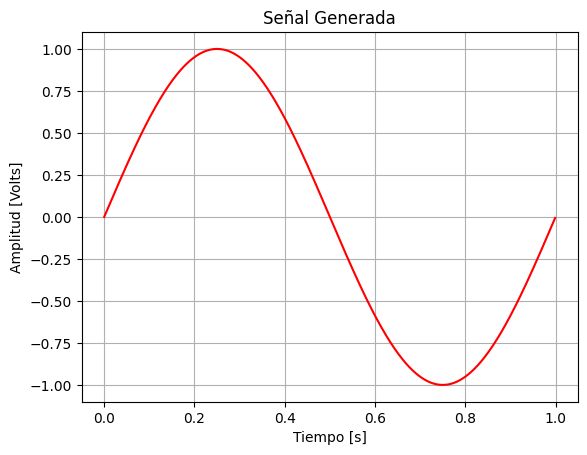

In [4]:
tt, yy = generador_de_señales(1, 0, 1, 0, 1000, 1000)
plt.figure(1)
plt.plot(tt, yy, color='red') 
plt.title('Señal Generada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.show()

## Bonus

Realizar los experimentos que se comentaron en clase. Siguiendo la notación de la función definida más arriba:
- f = 500 Hz
- f = 999 Hz
- f = 1001 Hz
- f = 2001 Hz

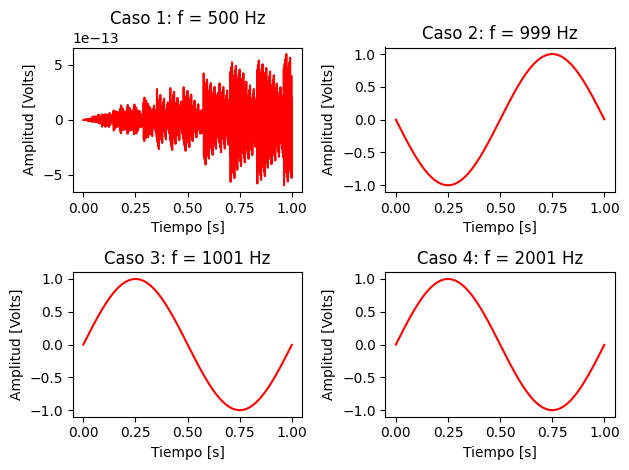

In [6]:
tt1, yy1 = generador_de_señales(1, 0, 500, 0, 1000, 1000)
tt2, yy2 = generador_de_señales(1, 0, 999, 0, 1000, 1000)
tt3, yy3 = generador_de_señales(1, 0, 1001, 0, 1000, 1000)
tt4, yy4 = generador_de_señales(1, 0, 2001, 0, 1000, 1000)

plt.figure(2)
plt.subplot(2,2,1)
plt.plot(tt1, yy1, color='red') 
plt.title('Caso 1: f = 500 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,2,2)
plt.plot(tt2, yy2, color='red') 
plt.title('Caso 2: f = 999 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,2,3)
plt.plot(tt3, yy3, color='red') 
plt.title('Caso 3: f = 1001 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,2,4)
plt.plot(tt4, yy4, color='red') 
plt.title('Caso 4: f = 2001 Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')

plt.tight_layout()  
plt.show()

## Teoria



El teorema de muestreo establece que una señal continua \(x(t)\), 
limitada en banda a una frecuencia máxima, 
puede ser representada exactamente a partir de sus muestras 
si la frecuencia de muestreo cumple:

$$
f_s \geq 2 f_{\max}
$$

donde:

$$ f_s = \frac{1}{T_s} \quad \text{es la frecuencia de muestreo} $$  

$$ T_s \quad \text{es el período de muestreo} $$

**Frecuencia de Nyquist**

La frecuencia de Nyquist se define como:

$$
f_N = \frac{f_s}{2}
$$

Para evitar el aliasing (solapamiento), debe cumplirse:

$$
f_{\max} \leq f_N
$$

## Casos de muestreo

**1. Muestreo crítico (Critical Sampling)**

Cuando la frecuencia de muestreo es exactamente el doble de la frecuencia máxima de la señal:

$$
f_s = 2 f_{\max}
$$

En este caso se cumple el criterio de Nyquist justo en el límite.  
La señal puede reconstruirse, pero cualquier desviación menor provoca aliasing.


**2. Sobre-muestreo (Oversampling)**

Cuando la frecuencia de muestreo es mayor al mínimo requerido:

$$
f_s > 2 f_{\max}
$$

Esto asegura que no haya aliasing y, además, facilita el diseño de filtros en sistemas reales.  
Se obtiene más información de la señal de la necesaria, a costa de mayor cantidad de muestras.


**3. Sub-muestreo (Undersampling)**

Cuando la frecuencia de muestreo es insuficiente:

$$
f_s < 2 f_{\max}
$$

En este caso ocurre un solapamiento de las replicas de la señal sampleada (aliasing) : las componentes de alta frecuencia se pliegan en el espectro y se confunden con frecuencias más bajas, distorsionando la señal reconstruida.





## Analisis de resultados

**Caso 1 --> Muestreo critico:**
Cuando la frecuencia es de 500hz estamos en el caso de muestreo critico, estamos justo al borde de la frecuencia de nyquist. Esto significa que teoricamente se podria recuperar la señal original utilizando un filtro ideal pero en la practica no es algo tan viable ya que cualquier ruido o minima interferencia generaria que se distorcione el solapamiento de las replicas.

**Caso 2 --> Undersampling:**
Imposible reconstruir la señal original. Notar que se invierte la fase de la onda, es un seno de signo negativo, al ser la frecuencia mas baja que la muestra de sampleo se da este fenomeno. La señal se pliega, hay alaising, y por ese motivo la señal se invierte 180 grados de fase. 

**Caso 3 y 4--> Muestreo correcto:**
A partir de la frecuencia 1000hz ya estariamos cumplianedo con el teorema de sampleo y podriamos recosntruir la señal con un filtro. Cuanto masa alta la frecuencia mejor. Amayores frecuencias entrariamos en el caso de oversampling, el unico defecto de esto es que tenemos muestras demas. Esto es algo aconsiderar cuando tenemos limitaciones con el almacenamiento. 




## Bonus Bonus

Voy a graficar una señal cuadrada de 5 Hz: 

Referencia: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html#scipy.signal.square 


(-2.0, 2.0)

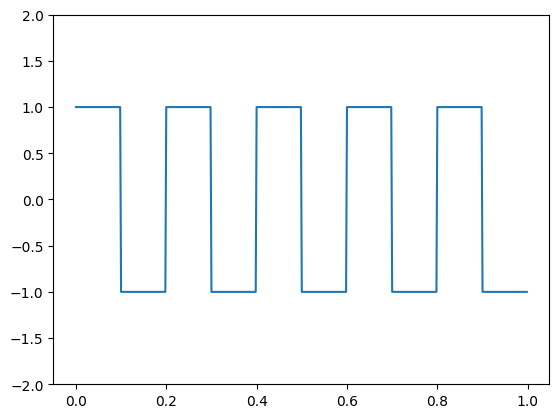

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)